<a href="https://colab.research.google.com/github/Walbyq/yolov11-bird-vs-drone/blob/main/bird_vs_drone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установка и импорт библиотек

In [22]:
# Установка библиотеки с моделью YOLO
!pip install ultralytics

In [23]:
# Импорт необходимых библиотек
import os
import kagglehub
from ultralytics import YOLO
from IPython.display import Image as IPyImage

# Загрузка файлов

Перед тем, как загрузить сам датасет из Kaggle, необходимо подключиться к нему по API:

In [24]:
# Загрузка ключа Kaggle API
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alinaburanova","key":"50a9248918ae6e72ca503c67c5ac5f77"}'}

In [25]:
# Установка прав доступа к файлу kaggle.json
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [26]:
# Загрузка датасета
!kaggle datasets download stealthknight/bird-vs-drone

# Разархивирование датасета
!unzip bird-vs-drone.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: Dataset/train/labels/DTR (8630).txt  
  inflating: Dataset/train/labels/DTR (8631).txt  
  inflating: Dataset/train/labels/DTR (8632).txt  
  inflating: Dataset/train/labels/DTR (8633).txt  
  inflating: Dataset/train/labels/DTR (8634).txt  
  inflating: Dataset/train/labels/DTR (8635).txt  
  inflating: Dataset/train/labels/DTR (8636).txt  
  inflating: Dataset/train/labels/DTR (8637).txt  
  inflating: Dataset/train/labels/DTR (8638).txt  
  inflating: Dataset/train/labels/DTR (8639).txt  
  inflating: Dataset/train/labels/DTR (864).txt  
  inflating: Dataset/train/labels/DTR (8640).txt  
  inflating: Dataset/train/labels/DTR (8641).txt  
  inflating: Dataset/train/labels/DTR (8642).txt  
  inflating: Dataset/train/labels/DTR (8643).txt  
  inflating: Dataset/train/labels/DTR (8644).txt  
  inflating: Dataset/train/labels/DTR (8645).txt  
  inflating: Dataset/train/labels/DTR (8646).txt  
  inflating: Da

Так как метки в txt файлах заданы неверно: класс 0 проставлен и для птиц, и для дронов, мы изменим их, используя названия файлов:

In [ ]:
# Проходимся по всем наборам данных
for dir in ["train", "valid", "test"]:

    # Папка, в которой ищем файлы .txt
    folder_path = f"/content/Dataset/{dir}/labels"

    # Проходимся по всем файлам в указанной папке
    for filename in os.listdir(folder_path):
        # Проверяем, чтобы файл был .txt и начинался на букву 'D'
        if filename.endswith('.txt') and filename.startswith('D'):
            filepath = os.path.join(folder_path, filename)

            # Чтение содержимого файла
            with open(filepath, 'r') as file:
                original_content = file.read()

            # Замена нуля на единицу в каждой строке
            modified_lines = []
            for line in original_content.splitlines():  # Разбиваем по строкам
                modified_line = line.replace('0 ', '1 ')  # Меняем только первый символ
                modified_lines.append(modified_line + '\n')  # Добавляем перенос строки

            # Запись обновленных данных обратно в файл
            with open(filepath, 'w') as file:
                file.writelines(modified_lines)

print(f"Данные успешно обновлены!")

Теперь создадим файл data.yaml, необходимый для обучения моделей YOLO. В нем укажем пути до тренировочного, валидационного и тестового наборов данных, а также классы и их количество.

In [29]:
# Данные для файла data.yaml
data_yaml_content = f"""
train: /content/Dataset/train/images
val: /content/Dataset/valid/images
test: /content/Dataset/test/images

nc: 2
names: ['bird', 'drone']
"""

# Создание файла data.yaml
with open("data.yaml", "w") as f:
    f.write(data_yaml_content)

print("Файл data.yaml успешно создан!")

Файл data.yaml успешно создан!


# Создание и обучение модели

In [30]:
# Загрузка предварительно обученной модели YOLOv11
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.7MB/s]


In [31]:
# Параметры
IMG_SIZE = 640
BATCH_SIZE = 32
EPOCHS = 3

# Обучение модели
model.train(data="data.yaml",
            imgsz=IMG_SIZE,
            batch=BATCH_SIZE,
            epochs=EPOCHS,
            plots=True,
            augment=True
           )

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=3, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=

100%|██████████| 755k/755k [00:00<00:00, 17.7MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Dataset/train/labels... 18323 images, 17 backgrounds, 0 corrupt: 100%|██████████| 18323/18323 [00:13<00:00, 1390.20it/s]

train: WARNING ⚠️ /content/Dataset/train/images/DTR (7703).jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Dataset/train/images/DTR (7769).jpg: 1 duplicate labels removed


train: New cache created: /content/Dataset/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 47330, len(boxes) = 58935. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Dataset/valid/labels... 1740 images, 3 backgrounds, 0 corrupt: 100%|██████████| 1740/1740 [00:02<00:00, 651.12it/s]


val: New cache created: /content/Dataset/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 818, len(boxes) = 1782. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      4.43G      1.666      2.322      1.758         95        640: 100%|██████████| 573/573 [07:21<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:22<00:00,  1.22it/s]


                   all       1740       1782      0.378      0.331      0.356      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      5.23G      1.547      1.929      1.676        109        640: 100%|██████████| 573/573 [06:58<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:21<00:00,  1.29it/s]


                   all       1740       1782       0.42      0.359      0.396      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      5.23G      1.395      1.731      1.571        105        640: 100%|██████████| 573/573 [06:59<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:21<00:00,  1.31it/s]


                   all       1740       1782      0.357      0.366      0.362      0.205

3 epochs completed in 0.377 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:33<00:00,  1.18s/it]


                   all       1740       1782      0.409      0.393      0.409      0.203
                  bird        699        742     0.0797     0.0957     0.0156     0.0037
                 drone       1038       1040      0.738      0.689      0.802      0.403
Speed: 0.2ms preprocess, 8.3ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b3bd704be10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

Видим, что точность обучения довольно низкая.

# Оценка обучения и прогнозирование.

Результаты обучения:


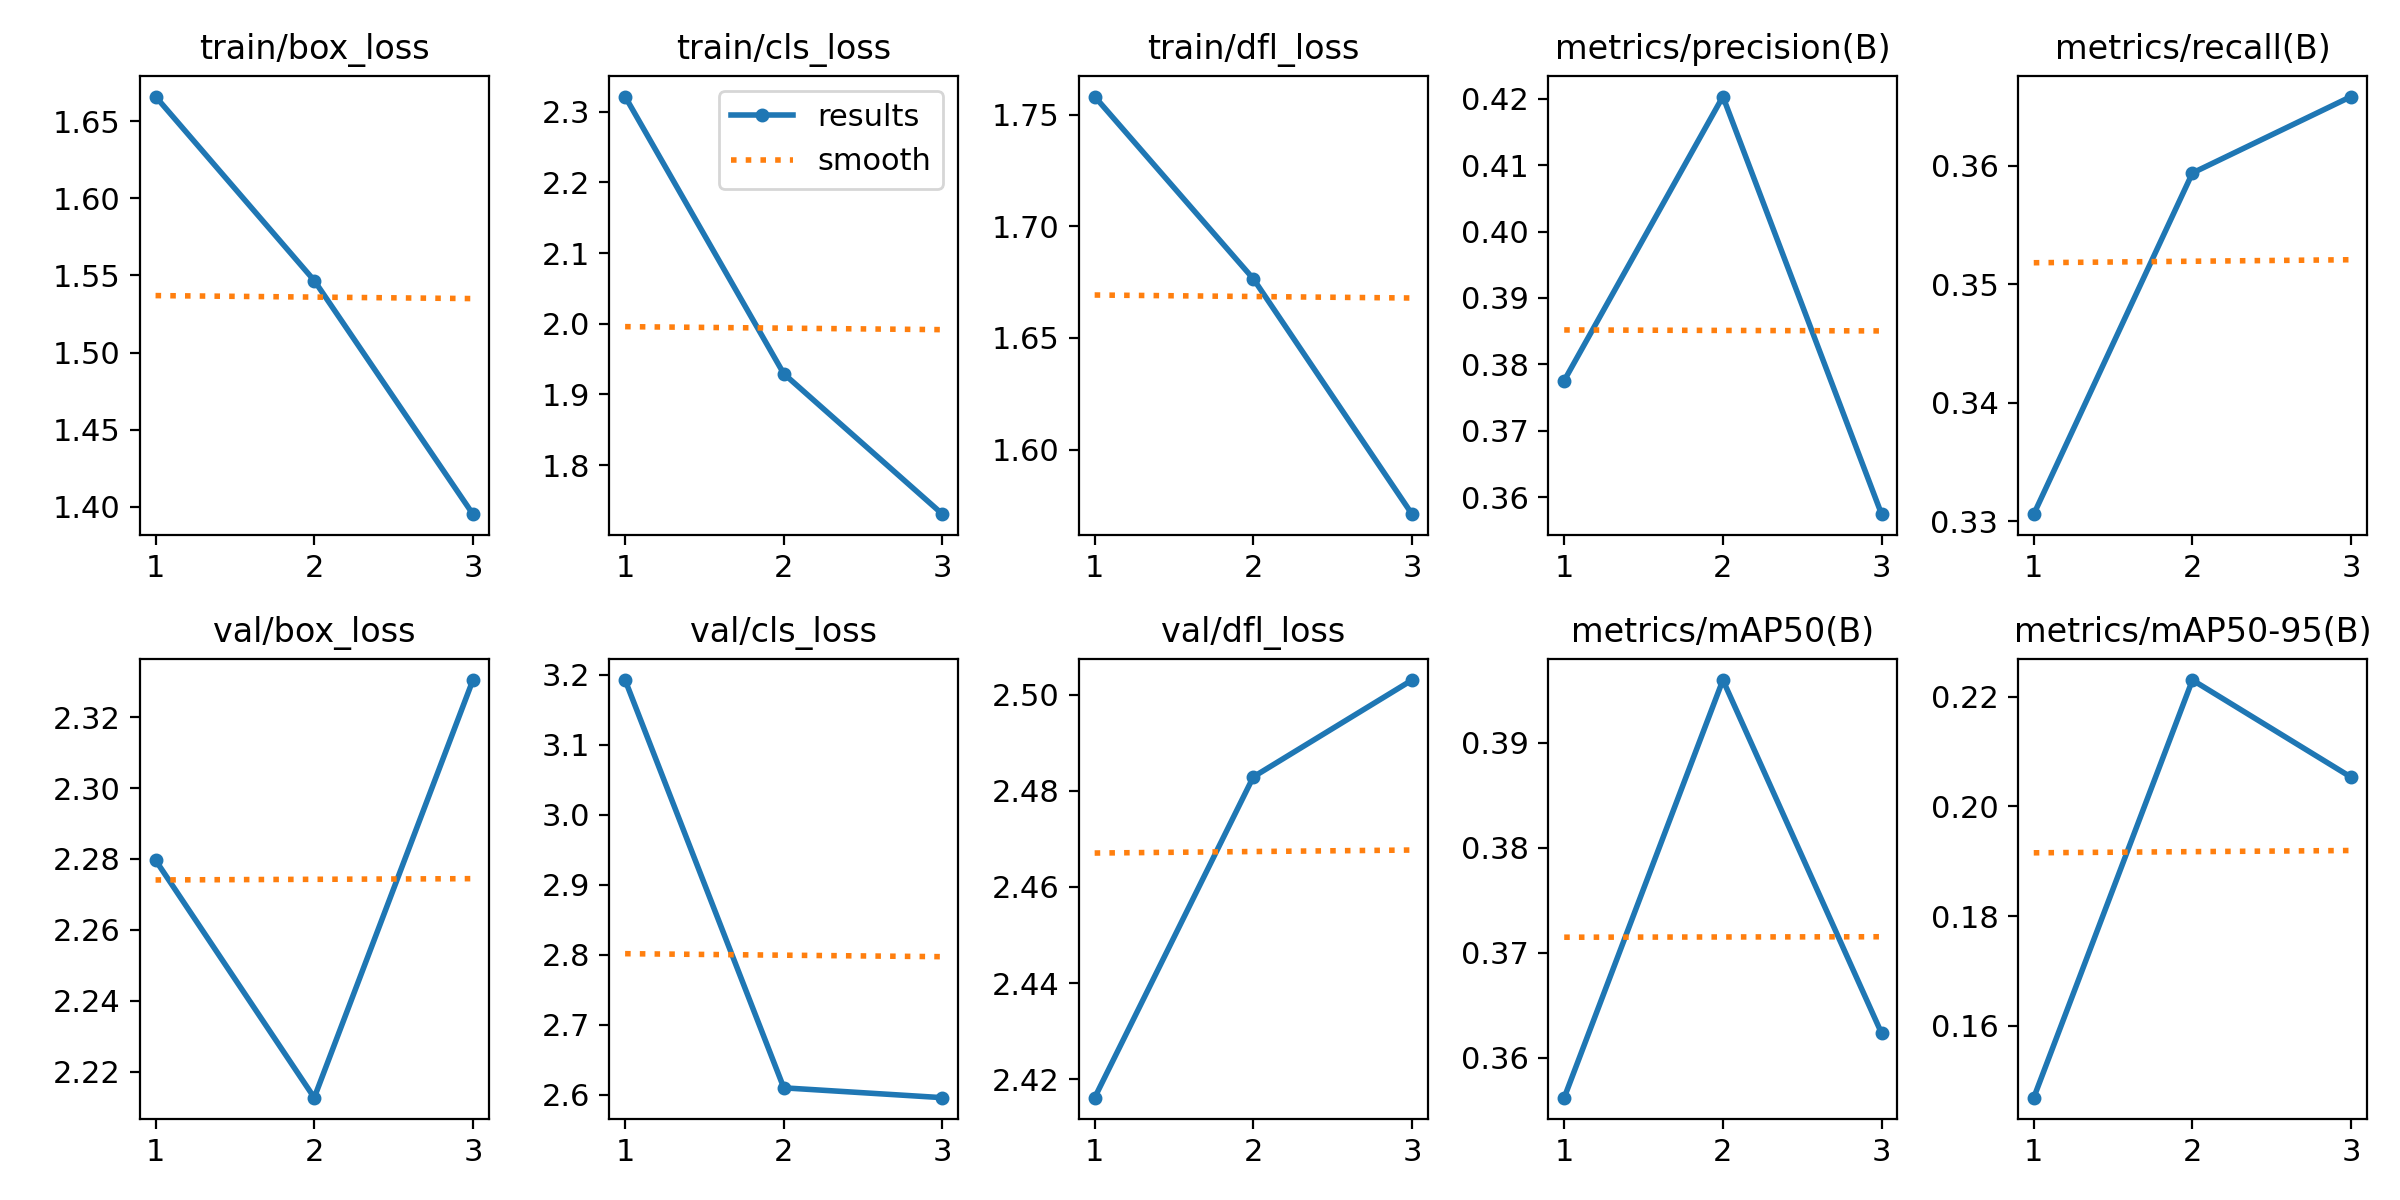

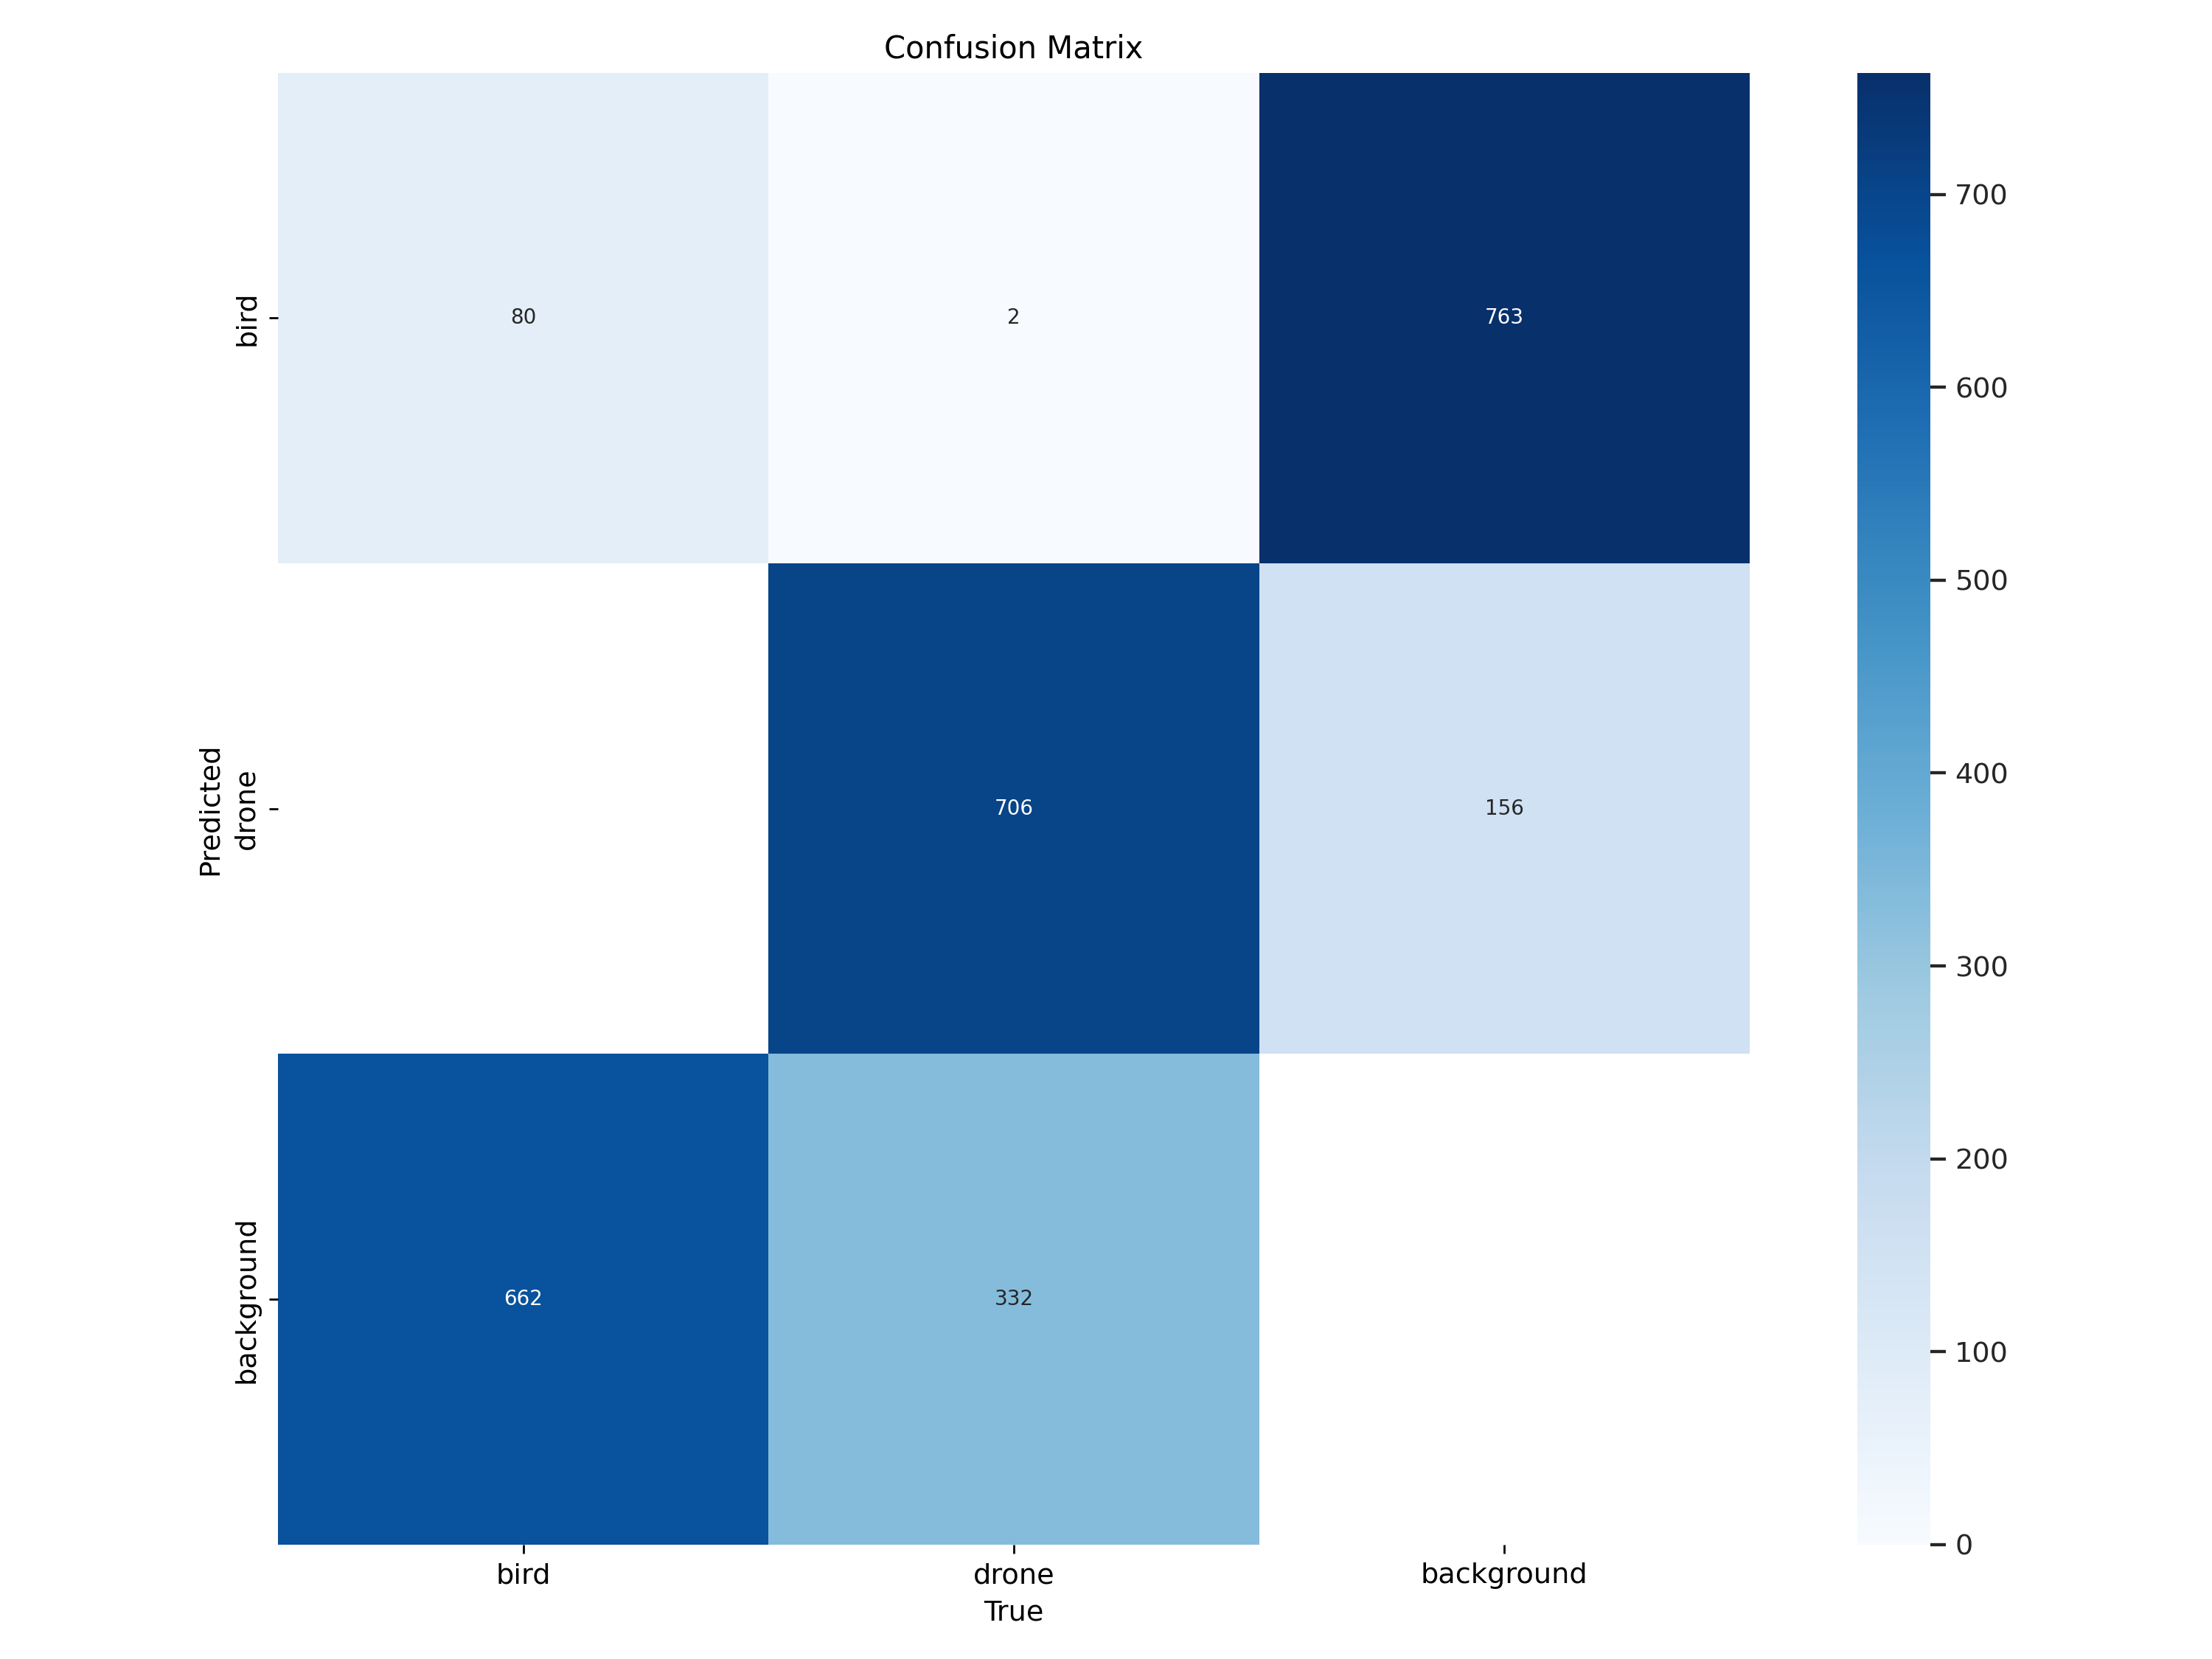

In [32]:
# Визуализация результатов обучения
print("Результаты обучения:")
display(IPyImage(filename="/content/runs/detect/train/results.png", width=800))
display(IPyImage(filename="/content/runs/detect/train/confusion_matrix.png", width=800))

In [33]:
# Загрузка обученной модели
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Вывод предсказаний
print("Предсказания:")
preds = model('/content/Dataset/test/images')

Предсказания:

image 1/889 /content/Dataset/test/images/BT (1).jpg: 640x640 (no detections), 26.0ms
image 2/889 /content/Dataset/test/images/BT (10).jpg: 640x640 1 bird, 20.1ms
image 3/889 /content/Dataset/test/images/BT (100).jpg: 640x640 (no detections), 20.2ms
image 4/889 /content/Dataset/test/images/BT (101).jpg: 640x640 (no detections), 18.8ms
image 5/889 /content/Dataset/test/images/BT (102).jpg: 640x640 1 bird, 18.9ms
image 6/889 /content/Dataset/test/images/BT (103).jpg: 640x640 1 bird, 20.4ms
image 7/889 /content/Dataset/test/images/BT (104).jpg: 640x640 1 bird, 20.2ms
image 8/889 /content/Dataset/test/images/BT (105).jpg: 640x640 (no detections), 19.8ms
image 9/889 /content/Dataset/test/images/BT (106).jpg: 640x640 (no detections), 18.6ms
image 10/889 /content/Dataset/test/images/BT (107).jpg: 640x640 1 bird, 18.9ms
image 11/889 /content/Dataset/test/images/BT (108).jpg: 640x640 (no detections), 19.0ms
image 12/889 /content/Dataset/test/images/BT (109).jpg: 640x640 1 bird, 19

Видим, что модель хорошо обучается на дронах, но с большим трудом различает птиц.

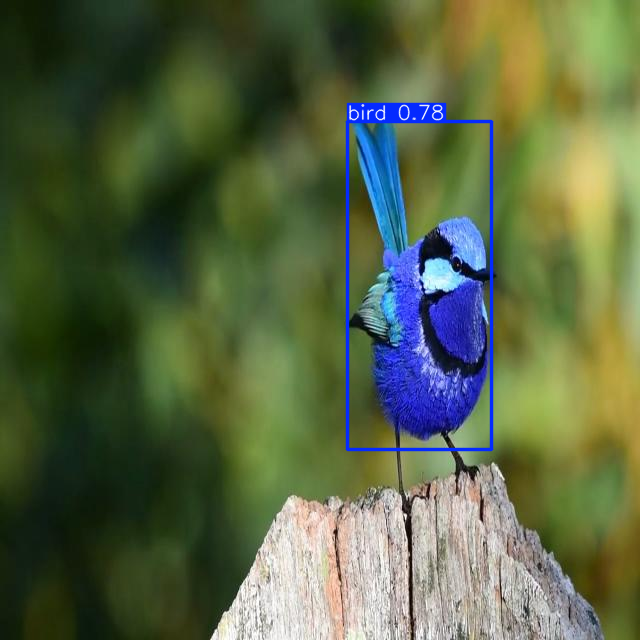

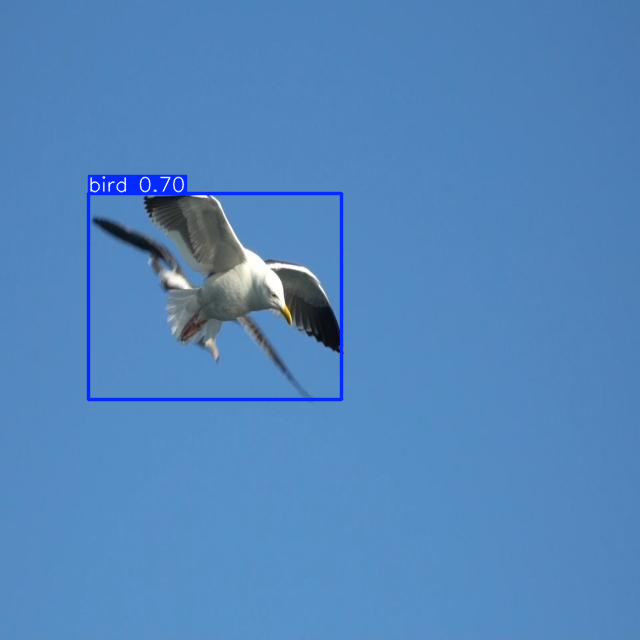

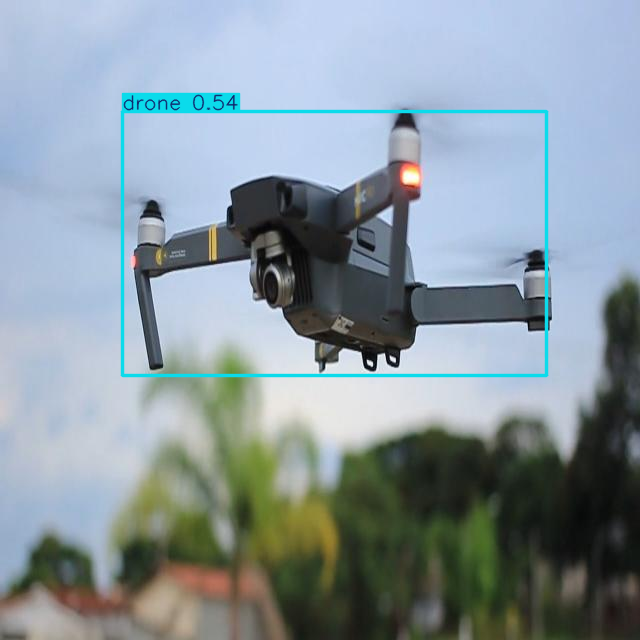

In [51]:
# Визуализация предсказания
preds[45].show()
preds[210].show()
preds[664].show()